# SVM classification SZ vs. HC 

Classify schizophrenia group from controls using cortical thickness deviation scores (z-scores) and then the true cortical thickness data to see which type of data better separates the groups.

In [1]:
! git clone https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo.git

Cloning into 'PCNtoolkit-demo'...
remote: Enumerating objects: 855, done.
remote: Counting objects: 100% (855/855), done.
remote: Compressing objects: 100% (737/737), done.
remote: Total 855 (delta 278), reused 601 (delta 101), pack-reused 0
Receiving objects: 100% (855/855), 18.07 MiB | 16.65 MiB/s, done.
Resolving deltas: 100% (278/278), done.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/content/PCNtoolkit-demo/')

In [3]:
Z_df = pd.read_csv('data/fcon1000_te_Z.csv')

In [4]:
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

In [5]:
Z_df.dropna(subset=['group'], inplace=True)

In [6]:
Z_df['group'] = Z_df['group'].replace("SZ",0)

In [7]:
Z_df['group'] = Z_df['group'].replace("Control",1)

In [8]:
deviations = Z_df.loc[:, Z_df.columns.str.contains('Z_predict')]

In [9]:
cortical_thickness = Z_df.loc[:, Z_df.columns.str.endswith('_thickness')]

In [10]:
# Data IO and generation
X1 = deviations
X2 = cortical_thickness
y = Z_df['group']
n_samples, n_features = X1.shape
random_state = np.random.RandomState(0)

In [11]:
X1 = X1.to_numpy()

In [12]:
X2 = X2.to_numpy()

In [13]:
y = y.astype(int)

In [14]:
y = y.to_numpy()

## Deviation scores as features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

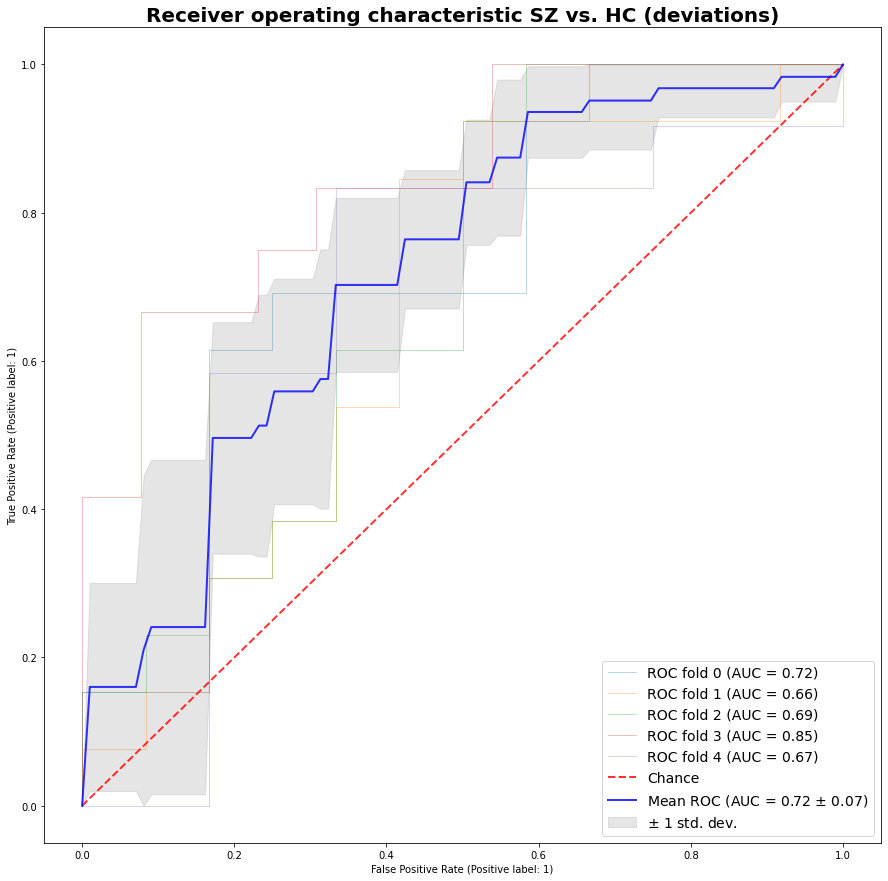

In [15]:
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(15,15))
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 25, 'xtick.labelsize':16,'ytick.labelsize':16,'legend.fontsize':14,'legend.title_fontsize':16}
plt.rcParams.update(parameters)

for i, (train, test) in enumerate(cv.split(X1, y)):
    classifier.fit(X1[train], y[train])
    viz = plot_roc_curve(classifier, X1[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_title('Receiver operating characteristic SZ vs. HC (deviations)', fontweight="bold", size=20)
ax.legend(loc="lower right")
plt.show()

## Raw cortical thickness data as features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

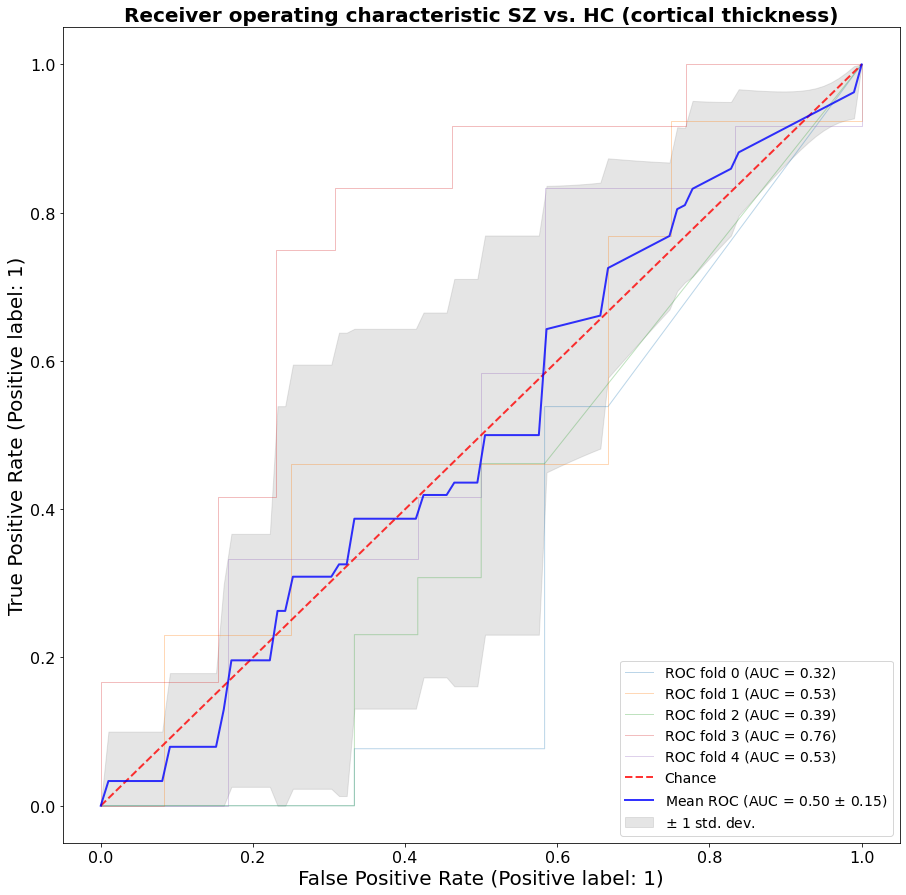

In [16]:
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(15,15))
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 25, 'xtick.labelsize':16,'ytick.labelsize':16,'legend.fontsize':14,'legend.title_fontsize':16}
plt.rcParams.update(parameters)

for i, (train, test) in enumerate(cv.split(X2, y)):
    classifier.fit(X2[train], y[train])
    viz = plot_roc_curve(classifier, X2[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_title('Receiver operating characteristic SZ vs. HC (cortical thickness)', fontweight="bold", size=20)
ax.legend(loc="lower right")
plt.show()

Which brain feature leads to a better classification between SZ & HC? 

# Classical case-control testing

In [ ]:
! pip install statsmodels

In [18]:
from scipy.stats import ttest_ind
from statsmodels.stats import multitest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
SZ = Z_df.query('group == 0')
HC = Z_df.query('group == 1')

### Mass univariate two sample t-tests on deviation score maps

In [20]:
SZ_deviations = SZ.loc[:, SZ.columns.str.contains('Z_predict')]

In [21]:
HC_deviations = HC.loc[:, HC.columns.str.contains('Z_predict')]

In [22]:
z_cols = SZ_deviations.columns

In [23]:
sz_hc_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(SZ_deviations[column], HC_deviations[column])
    sz_hc_pvals_z.loc[index, 'pval'] = test.pvalue
    sz_hc_pvals_z.loc[index, 'tstat'] = test.statistic
    sz_hc_pvals_z.loc[index, 'roi'] = column

In [24]:
sz_hc_fdr_z = multitest.fdrcorrection(sz_hc_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [25]:
sz_hc_pvals_z['fdr_pval'] = sz_hc_fdr_z[1]

In [26]:
sz_hc_z_sig_diff = sz_hc_pvals_z.query('pval < 0.05')

In [27]:
sz_hc_z_sig_diff

,roi,fdr_pval,pval,tstat
1,Left-Amygdala_Z_predict,0.089187,0.04314,-2.043665
3,rh_MeanThickness_thickness_Z_predict,0.001476,0.000047,-4.219322
4,lh_G&S_frontomargin_thickness_Z_predict,0.066297,0.027299,-2.234088
5,rh_Pole_temporal_thickness_Z_predict,0.046111,0.016768,-2.425135
7,rh_G_occipital_middle_thickness_Z_predict,0.08663,0.040304,-2.072725
...,...,...,...,...
176,Left-Lateral-Ventricle_Z_predict,0.035835,0.010348,2.604355
177,rh_G_front_inf-Orbital_thickness_Z_predict,0.067346,0.029075,-2.20854
179,lh_S_temporal_inf_thickness_Z_predict,0.011567,0.001484,-3.251486
180,rh_G_precentral_thickness_Z_predict,0.007984,0.00079,-3.442643


In [28]:
sz_hc_z_sig_diff.shape

(96, 4)

### Mass univariate two sample t-tests on deviation score maps and true cortical thickness data

In [29]:
SZ_cortical_thickness = SZ.loc[:, SZ.columns.str.endswith('_thickness')]

In [30]:
HC_cortical_thickness = HC.loc[:, HC.columns.str.endswith('_thickness')]

In [31]:
ct_cols = SZ_cortical_thickness.columns

In [32]:
sz_hc_pvals_ct = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(ct_cols):
    test = ttest_ind(SZ_cortical_thickness[column], HC_cortical_thickness[column])
    sz_hc_pvals_ct.loc[index, 'pval'] = test.pvalue
    sz_hc_pvals_ct.loc[index, 'tstat'] = test.statistic
    sz_hc_pvals_ct.loc[index, 'roi'] = column

In [33]:
sz_hc_fdr_ct = multitest.fdrcorrection(sz_hc_pvals_ct['pval'], alpha=0.05, method='indep', is_sorted=False)

In [34]:
sz_hc_pvals_ct['fdr_pval'] = sz_hc_fdr_ct[1]

In [35]:
sz_hc_ct_sig_diff = sz_hc_pvals_ct.query('pval < 0.05')

In [36]:
sz_hc_ct_sig_diff

,roi,fdr_pval,pval,tstat
1,lh_G&S_occipital_inf_thickness,0.025994,0.002599,-3.074854
5,lh_G&S_cingul-Ant_thickness,0.01673,0.000558,-3.54496
6,lh_G&S_cingul-Mid-Ant_thickness,0.066125,0.01613,-2.439868
7,lh_G&S_cingul-Mid-Post_thickness,0.1104,0.046162,-2.014447
11,lh_G_front_inf-Opercular_thickness,0.070606,0.021034,-2.337646
...,...,...,...,...
135,rh_S_oc-temp_med&Lingual_thickness,0.076018,0.026761,-2.24211
141,rh_S_postcentral_thickness,0.070606,0.019369,-2.369738
142,rh_S_precentral-inf-part_thickness,0.019935,0.001409,-3.267676
143,rh_S_precentral-sup-part_thickness,0.046377,0.006802,-2.753296


In [37]:
sz_hc_ct_sig_diff.shape

(67, 4)